<a href="https://colab.research.google.com/github/ritesh-nanda/Colab/blob/main/Internship_Studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing

In [1]:
import datetime
import time 

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from tensorflow import keras

In [2]:
def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  P = ['H', 'M', 'S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h=mm
        mm=''
      elif (i == "M"):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
      if (h==''):
        h='00'
      if (m==''):
        m='00'
      if (s==''):
        s='00'
      
      bp = h+':'+m+':'+s
      return bp


Preprocessing

In [3]:
data = pd.read_csv('train.csv')
df = pd.DataFrame(data)
print(df.shape)
df.head()

df = df[df.views!='F']
df = df[df.likes!='F']
df = df[df.dislikes!='F']
df = df[df.comment!='F']

print(df.shape)

df['views'] = pd.to_numeric(df['views'])
df['likes'] = pd.to_numeric(df['likes'])
df['dislikes'] = pd.to_numeric(df['dislikes'])
df['comment'] = pd.to_numeric(df['comment'])
df['adview'] = pd.to_numeric(df['adview'])

video_id = df.vidid

df['vidid'] = LabelEncoder().fit_transform(df['vidid'])
df['published'] = LabelEncoder().fit_transform(df['published'])
df['duration'] = LabelEncoder().fit_transform(df['duration'])
df['category'] = LabelEncoder().fit_transform(df['category'])

time = data["duration"].apply(checki)
def func_sec(time_string):
  h,m,s = time_string.split(':')
  return int(h)*3600+int(m)*60+int(s)

time1 = time.apply(func_sec)
df['duration'] = time1

df.head()

(14999, 9)
(14637, 9)


,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,420,5
1,2741,2,1707,56,2,6,2185,540,3
2,8138,1,2023,25,0,2,2094,120,2
3,9005,6,620860,777,161,153,2119,240,7
4,122,1,666,1,0,0,2091,31,3


Visualisation

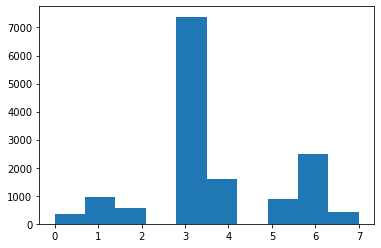

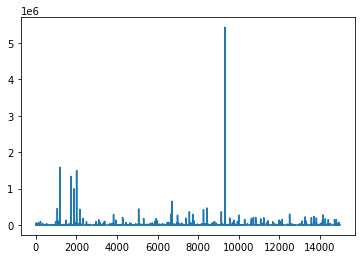

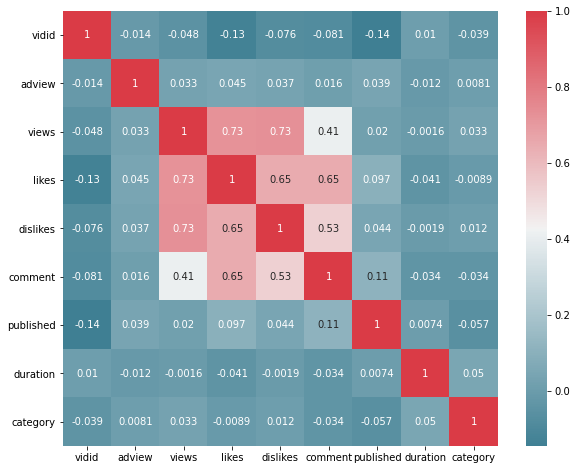

In [4]:
plt.hist(df.category)
plt.show()
plt.plot(df.adview)
plt.show()

#plotting correlation graph
f, ax = plt.subplots(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype=np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), 
           square = True, ax=ax, annot=True)
plt.show()

Splitting of Data

In [5]:
y_train = pd.DataFrame(data = df.iloc[:, 1].values, columns=['target'])
df_train = df.drop(['adview'], axis = 1)
df_train = df.drop(['vidid'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(df_train, y_train, test_size = 0.2, random_state = 111)
X_train.shape
y_train.shape

(11709, 1)

Normalisation

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Evaluation Matrics

In [7]:
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, prediction))
    print("Mean Squared Error:", metrics.mean_squared_error(y_test, prediction))
    print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Linear Regression

In [8]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test, y_test, linear_regression)

Mean Absolute Error: 4017.6536771109736
Mean Squared Error: 6281965312.28563
Root Mean Squared Error: 79258.85005654341


SVM

In [9]:
svr = SVR()
svr.fit(X_train, y_train)
print_error(X_test, y_test, svr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1529.5279977266305
Mean Squared Error: 910833558.6024585
Root Mean Squared Error: 30180.01919486564


Decision Tree

In [10]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

Mean Absolute Error: 3798.9887295081967
Mean Squared Error: 5918643122.164276
Root Mean Squared Error: 76932.7181514099


Random Forest

In [11]:
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2

random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, 
                                      min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
random_forest.fit(X_train, y_train)
print_error(X_test, y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3408.3012062914077
Mean Squared Error: 2318651745.5765905
Root Mean Squared Error: 48152.38047673854


Keras

In [12]:
krs = keras.models.Sequential([
    keras.layers.Dense(6, activation = 'relu',
         input_shape = X_train.shape[1:]),
    keras.layers.Dense(6, activation = 'relu'),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error

krs.compile(optimizer = optimizer, loss = loss, metrics = ['mean_squared_error'])
history = krs.fit(X_train, y_train, epochs = 100)

krs.summary()

print_error(X_test, y_test, krs)

Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 3265877248.0000 - mean_squared_error: 3265877248.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 3265872384.0000 - mean_squared_error: 3265872384.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 3265861120.0000 - mean_squared_error: 3265861120.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 3265848320.0000 - mean_squared_error: 3265848320.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 3265831936.0000 - mean_squared_error: 3265831936.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 3265806080.0000 - mean_squared_error: 3265806080.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 3265769472.0000 - mean_squared_error: 3265769472.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 3265735168.0000 - mean

Saving Best Model

In [13]:
import joblib 
joblib.dump(svr, "svr_model.pkl")

['svr_model.pkl']

Loading, Pre-processing and testing on test set

In [14]:
data2 = pd.read_csv('test.csv')
df2 = pd.DataFrame(data2)
print(df2.shape)

df2 = df2[df2.views!='F']
df2 = df2[df2.likes!='F']
df2 = df2[df2.dislikes!='F']
df2 = df2[df2.comment!='F']

print(df2.shape)

df2['views'] = pd.to_numeric(df2['views'])
df2['likes'] = pd.to_numeric(df2['likes'])
df2['dislikes'] = pd.to_numeric(df2['dislikes'])
df2['comment'] = pd.to_numeric(df2['comment'])

df2['vidid'] = LabelEncoder().fit_transform(df2['vidid'])
df2['published'] = LabelEncoder().fit_transform(df2['published'])
df2['duration'] = LabelEncoder().fit_transform(df2['duration'])
df2['category'] = LabelEncoder().fit_transform(df2['category'])

time1 = data2["duration"].apply(checki)
def func_sec(time_string):
  h,m,s = time_string.split(':')
  return int(h)*3600+int(m)*60+int(s)

time2 = time1.apply(func_sec)
df2['duration'] = time2

df2.head()

(8764, 8)
(8549, 8)


,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,420,1
1,3444,1040132,8171,340,1047,1825,360,5
2,1593,28534,31,11,1,1009,2220,3
3,3775,1316715,2284,250,274,116,540,6
4,7644,1893173,2519,225,116,1892,180,1


In [15]:
scaler = MinMaxScaler()
test_set = scaler.fit_transform(df2)

In [16]:
loaded_model = joblib.load('svr_model.pkl')
results = loaded_model.predict(test_set)
print(results)

[2.78276557 6.42834454 3.72643075 ... 6.76246502 7.70514439 7.59874764]


Saving into a CSV file

In [17]:
prediction_data = pd.DataFrame(results)
prediction_data.to_csv('PredictedAdview.csv')